In [3]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
data = pd.read_csv('train_triplets.txt', sep="\t", header = None,)



,0,1,2
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1


In [9]:
data.head()

,User_ID,Song_ID,Count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1


In [18]:
uniqueCount = set(data.Count)
print uniqueCount


set([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221

In [28]:
def f(row):
    if row['Count'] >= 10:
        val = '>=10'
    else:
        val = row['Count']
    return val

In [29]:
data['UniqueCount'] = data.apply(f, axis=1)

In [16]:
data.to_csv('NewDF.csv', index=False)

In [4]:
data2 = pd.read_csv('NewDF.csv')


In [18]:
data2.describe()

,Count
count,4.837359e+07
mean,2.866859e+00
std,6.437725e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,9.667000e+03


In [27]:
print "The number of combinations is:", format(len(data2),",d")

The number of combinations is: 48,373,586


In [24]:
print "The number of unique Users is:",format(len(set(data2.User_ID)),",d")

The number of unique Users is: 1,019,318


In [25]:
print "The number of unique Songs is:",format(len(set(data2.Song_ID)), ",d")

The number of unique Songs is: 384,546


In [9]:
print set(data2.Count)
print format(len(set(data2.Count)),",d")

set([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221

In [28]:
data2.head()

,User_ID,Song_ID,Count,UniqueCount
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1,1


In [31]:
data2['UniqueCount'] = data2['UniqueCount'].astype('category')

In [34]:
set(data2.UniqueCount)

{'1', '2', '3', '4', '5', '6', '7', '8', '9', '>=10'}

In [8]:
TestSet = data2[0:10000]
len(TestSet)

10000

In [10]:
print "The number of unique Songs is:",format(len(set(TestSet.Song_ID)), ",d")
print "The number of unique Users is:",format(len(set(TestSet.User_ID)),",d")
print "The number of combinations is:", format(len(TestSet),",d")

The number of unique Songs is: 7,849
The number of unique Users is: 173
The number of combinations is: 10,000


In [21]:

TestSet['UniqueCount'] = TestSet['UniqueCount'].astype(object)


C:\Users\James\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


'1'

In [53]:
print TestSet.UniqueCount.value_counts()



1       6079
2       1556
3        709
5        440
>=10     363
4        320
6        237
7        147
8         96
9         53
Name: UniqueCount, dtype: int64


In [26]:
print data2.UniqueCount.value_counts()


1       28755966
2        7336825
3        3214271
>=10     2477559
5        2250999
4        1805081
6        1004971
7         675413
8         488641
9         363860
Name: UniqueCount, dtype: int64


In [27]:
def GreaterThanOne(row):
    if row['Count'] > 1:
        val = 1
    else:
        val = 0
    return val


In [29]:
data2['G1'] = data2.apply(GreaterThanOne, axis=1)

In [31]:
print data2.G1.value_counts()

0    28755966
1    19617620
Name: G1, dtype: int64


In [9]:
#data2.to_csv('NewDF2.csv', index=False)
data2 = pd.read_csv('NewDF2.csv')

In [10]:
UCS = data2[['User_ID', 'Song_ID']].groupby(['User_ID']).agg(['count'])
SCU = data2[['Song_ID', 'User_ID']].groupby(['Song_ID']).agg(['count'])

In [7]:
#UCS.to_csv('UCS.csv', index=False)
#SCU.to_csv('SCU.csv', index=False)
UCS = pd.read_csv('UCS.csv')
SCU = pd.read_csv('SCU.csv')


In [48]:
print 'Number of Unique Users that Listens to a Song'
print SCU.describe()
print
print
print 'Number of Unique Songs Each User Listens To'
print UCS.describe()


Number of Unique Users that Listens to a Song
             User_ID
               count
count  384546.000000
mean      125.794017
std       799.025834
min         1.000000
25%         4.000000
50%        13.000000
75%        52.000000
max    110479.000000


Number of Unique Songs Each User Listens To
            Song_ID
              count
count  1.019318e+06
mean   4.745682e+01
std    5.781573e+01
min    1.000000e+01
25%    1.600000e+01
50%    2.700000e+01
75%    5.500000e+01
max    4.400000e+03


In [76]:
UCS2 = TestSet[['User_ID', 'Song_ID']].groupby(['User_ID']).agg(['count'])
SCU2 = TestSet[['Song_ID', 'User_ID']].groupby(['Song_ID']).agg(['count'])

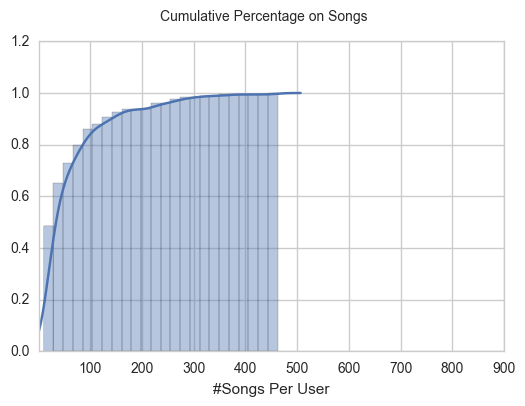

In [92]:
UCSCDF2 = sns.distplot(UCS2.Song_ID['count'],
                      hist_kws=dict(cumulative=True),
                      kde_kws=dict(cumulative=True))
plt.xlim(1, 900)
plt.xlabel('#Songs Per User')
plt.suptitle('Cumulative Percentage on Songs')
plt.show()



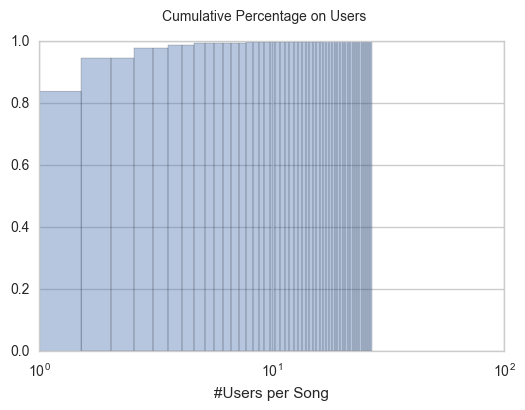

In [91]:
SCUCDF2 = sns.distplot(SCU2.User_ID['count'],
                      hist_kws=dict(cumulative=True),
                      kde_kws=dict(cumulative=True))
SCUCDF2.set(xscale="log")
plt.xlabel('#Users per Song')
plt.suptitle('Cumulative Percentage on Users')
plt.show()



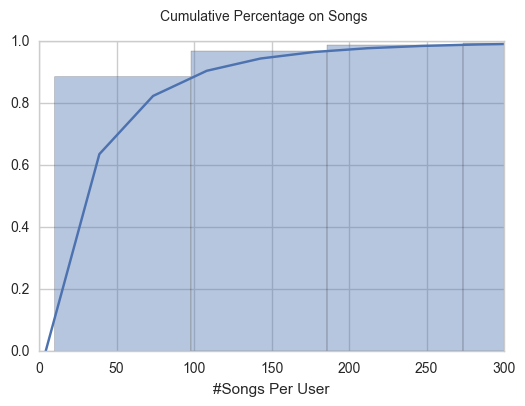

In [93]:
UCSCDF = sns.distplot(UCS.Song_ID['count'],
                      hist_kws=dict(cumulative=True),
                      kde_kws=dict(cumulative=True))
plt.xlim(0, 300)
plt.xlabel('#Songs Per User')
plt.suptitle('Cumulative Percentage on Songs')
plt.show()





C:\Users\James\Anaconda2\lib\site-packages\scipy\integrate\quadpack.py:356: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


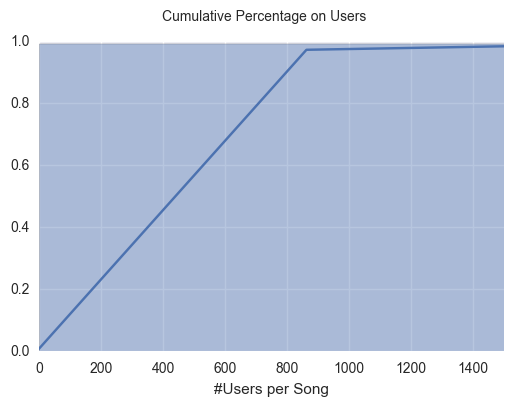

In [11]:
SCUCDF = sns.distplot(SCU.User_ID['count'],
                      hist_kws=dict(cumulative=True),
                      kde_kws=dict(cumulative=True))
plt.xlim(0, 1500)
plt.xlabel('#Users per Song')
plt.suptitle('Cumulative Percentage on Users')
plt.show()


NameError: name 'hi' is not defined